In [2]:
%config IPCompleter.greedy=True

In [3]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pywt
import librosa
import librosa.display

In [4]:
wavelet_form = 'db6'
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
audio_data, sr = librosa.load('./data/077-echo-guitar-skank.wav')

In [6]:
audio_data.shape

(137329,)

In [7]:
audio_data

array([-0.00925131, -0.01029749, -0.00885654, ..., -0.012232  ,
       -0.01700904,  0.        ], dtype=float32)

In [8]:
audio_data = audio_data/np.max(audio_data)

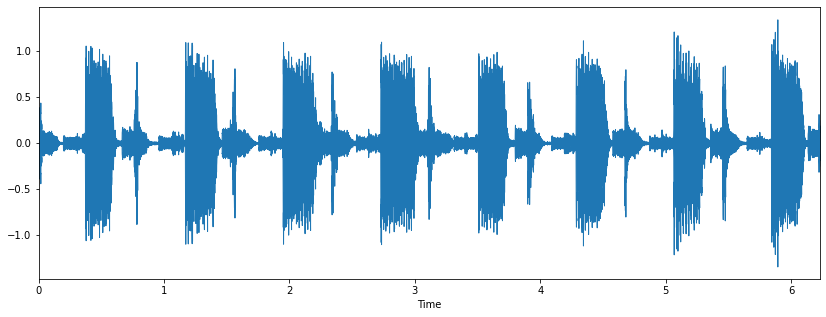

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_data, sr=sr)

In [10]:
DWTcoeffs = pywt.swt(data=audio_data[:-1], wavelet=wavelet_form, level=4)
#pywt.wavedec(data=audio_data, wavelet=wavelet_form, level=5)

In [11]:
recs = []
for keep in (0.20, 0.5):
    n_coef = []
    for tup in DWTcoeffs:
        n_tup = ()
        for coef in tup:
            tresh = coef[int(np.floor((1-keep) * len(coef)))]
            ind = np.abs(coef) > tresh
            Cfilt = coef * ind
            #Cfilt[Cfilt < np.percentile(Cfilt, keep)] = 0
            #Cfilt[(np.abs(Cfilt)  np.max(Cfilt) * 1)] = 0
            n_tup += (Cfilt, )
        n_coef.append(n_tup)
    rec = pywt.iswt(coeffs=n_coef, wavelet=wavelet_form)
    recs.append(rec)
    wavfile.write(f'./data/keep-{keep}.wav', sr, rec)

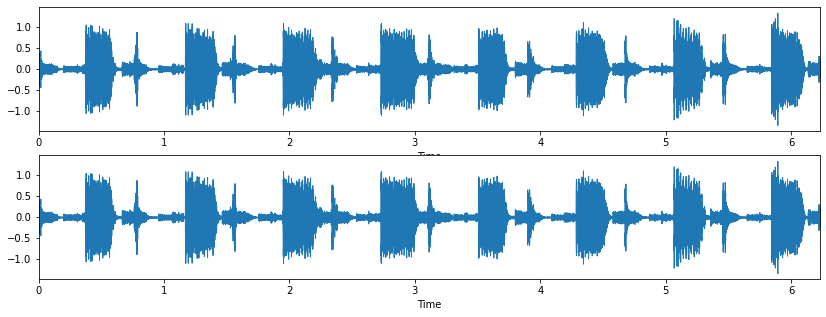

In [12]:
fig, axes = plt.subplots(nrows=len(recs), ncols=1, figsize=(14, 5))
for ax in axes:
    librosa.display.waveplot(audio_data, sr=sr, ax=ax)

In [13]:
def rle (img, top):
    flat_img = img
    flat_img = np.where(flat_img < keep, 1, 0).astype(np.uint8)

    starts = np.array((flat_img[:-1] == 0) & (flat_img[1:] == 1))
    ends = np.array((flat_img[:-1] == 1) & (flat_img[1:] == 0))
    starts_ix = np.where(starts)[0] + 2
    ends_ix = np.where(ends)[0] + 2
    lengths = ends_ix - starts_ix
    
    return starts_ix, lengths